<a href="https://colab.research.google.com/github/indhu68/AppliedML_Project/blob/main/AppliedML_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
Validation RMSE: 12.077240943908691
Epoch 2/10
Validation RMSE: 4.266841411590576
Epoch 3/10
Validation RMSE: 2.6934099197387695
Epoch 4/10
Validation RMSE: 4.213574409484863
Epoch 5/10
Validation RMSE: 2.3695058822631836
Epoch 6/10
Validation RMSE: 4.33284854888916
Epoch 7/10
Validation RMSE: 3.336292266845703
Epoch 8/10
Validation RMSE: 1.9649521112442017
Epoch 9/10
Validation RMSE: 1.1682544946670532
Epoch 10/10
Validation RMSE: 1.6788986921310425


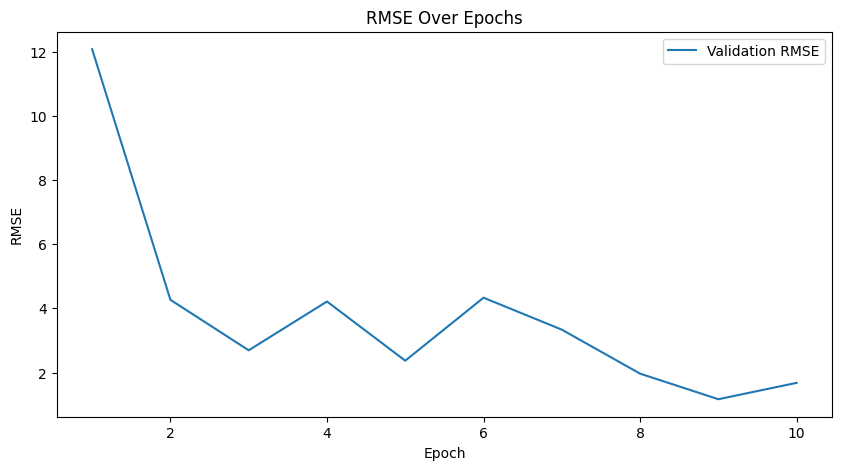

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Define the LSTM model
class SemanticRNN(Model):
    def __init__(self, units, dropout_rate=0.3, num_layers=2):
        super(SemanticRNN, self).__init__()
        self.lstm_layers = [LSTM(units, return_sequences=True if i < num_layers - 1 else False,
                                 recurrent_dropout=0.2) for i in range(num_layers)]
        self.dropouts = [Dropout(dropout_rate) for _ in range(num_layers)]
        self.dense = Dense(1)  # Single output neuron for regression

    def call(self, inputs):
        x = inputs
        for lstm, dropout in zip(self.lstm_layers, self.dropouts):
            x = lstm(x)
            x = dropout(x)
        return self.dense(x)

# Custom loss function
def custom_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Constants
M = 256
batch_size = 300000
k = 8
n = 4
seed = 42
f = 5.9e9
lamda = 0.05
Pt = 1
BW = 10e6
PLE = 2.8
Transmitted_Power_dBm = 20
Noise_val = 95
std_shadow = 3

# Data generation
np.random.seed(seed)
tf.random.set_seed(seed)

tr = np.floor(np.random.uniform(1, M, batch_size))
s = np.floor(np.random.uniform(1, M, batch_size)).astype('int64')
rand1 = np.random.normal(0, std_shadow, batch_size)

Beta = {}
SNR_var = {}
for i in range(batch_size):
    Beta[i] = 10 * np.log10(lamda / ((4 * np.pi * s[i]) ** PLE))
    SNR_var[i] = Beta[i] + Transmitted_Power_dBm - Noise_val + rand1[i]

ad_noise_SNR = np.array(list(SNR_var.values()))
ad_noise_SNR = np.expand_dims(ad_noise_SNR, axis=-1)  # Add a new axis for features
ad_noise_SNR = np.expand_dims(ad_noise_SNR, axis=-1)  # Add a new axis for timesteps
# Prepare tensors
X_tensor = tf.convert_to_tensor(ad_noise_SNR, dtype=tf.float32)
Y_tensor = tf.convert_to_tensor(ad_noise_SNR, dtype=tf.float32)

# Model setup
model = SemanticRNN(units=128, dropout_rate=0.3, num_layers=3)
model.compile(optimizer='adam', loss=custom_loss, metrics=['mean_squared_error'])

# Training setup
epochs = 10
batch_size = 64
validation_split = 0.2
num_val_samples = int(validation_split * len(X_tensor))
num_train_samples = len(X_tensor) - num_val_samples
train_dataset = tf.data.Dataset.from_tensor_slices((X_tensor[:num_train_samples], Y_tensor[:num_train_samples])).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((X_tensor[num_train_samples:], Y_tensor[num_train_samples:])).batch(batch_size)

# Manual training loop with RMSE tracking
rmse_history = []
val_rmse_history = []
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    # Training loop
    for x_batch, y_batch in train_dataset:
        model.train_on_batch(x_batch, y_batch)

    # Validation loop
    val_predictions = []
    val_targets = []
    for x_batch, y_batch in val_dataset:
        preds = model.predict_on_batch(x_batch)
        val_predictions.extend(preds.flatten())
        val_targets.extend(y_batch.numpy().flatten())

    # Calculate RMSE for validation data
    val_rmse = np.sqrt(mean_squared_error(val_targets, val_predictions))
    val_rmse_history.append(val_rmse)
    print(f"Validation RMSE: {val_rmse}")

# Plot RMSE history
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), val_rmse_history, label='Validation RMSE')
plt.title('RMSE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

Epoch 1/10
Validation RMSE: 12.071686744689941
Epoch 2/10
Validation RMSE: 10.389930725097656
Epoch 3/10
Validation RMSE: 2.493443250656128
Epoch 4/10
Validation RMSE: 3.85483717918396
Epoch 5/10
Validation RMSE: 1.9898574352264404
Epoch 6/10
Validation RMSE: 4.1885151863098145
Epoch 7/10
Validation RMSE: 2.959290027618408
Epoch 8/10
Validation RMSE: 1.8778443336486816
Epoch 9/10
Validation RMSE: 1.2825689315795898
Epoch 10/10
Validation RMSE: 1.2112129926681519


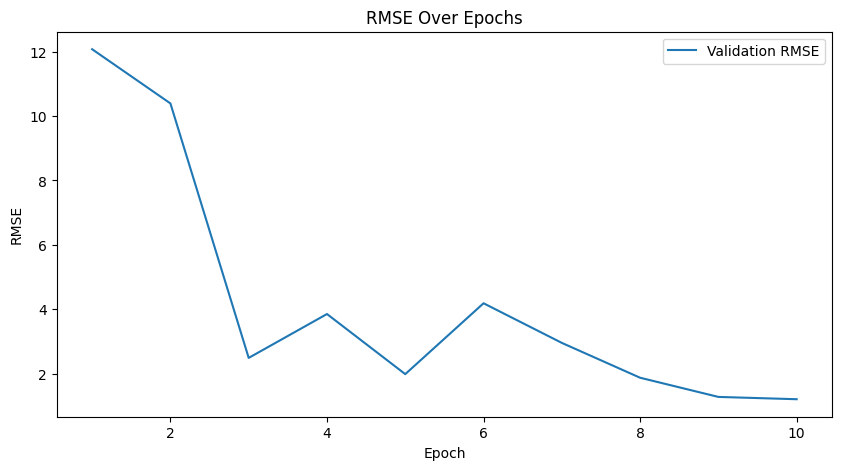

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Define the LSTM model
class SemanticRNN(Model):
    def __init__(self, units, dropout_rate=0.3, num_layers=2):
        super(SemanticRNN, self).__init__()
        self.lstm_layers = [LSTM(units, return_sequences=True if i < num_layers - 1 else False,
                                 recurrent_dropout=0.2) for i in range(num_layers)]
        self.dropouts = [Dropout(dropout_rate) for _ in range(num_layers)]
        self.dense = Dense(1)  # Single output neuron for regression

    def call(self, inputs):
        x = inputs
        for lstm, dropout in zip(self.lstm_layers, self.dropouts):
            x = lstm(x)
            x = dropout(x)
        return self.dense(x)

# Custom loss function
def custom_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Constants
M = 256
batch_size = 300000
k = 8
n = 4
seed = 42
f = 5.9e9
lamda = 0.05
Pt = 1
BW = 10e6
PLE = 2.8
Transmitted_Power_dBm = 23.010299957
Noise_val = 95
std_shadow = 3

# Data generation
np.random.seed(seed)
tf.random.set_seed(seed)

tr = np.floor(np.random.uniform(1, M, batch_size))
s = np.floor(np.random.uniform(1, M, batch_size)).astype('int64')
rand1 = np.random.normal(0, std_shadow, batch_size)

Beta = {}
SNR_var = {}
for i in range(batch_size):
    Beta[i] = 10 * np.log10(lamda / ((4 * np.pi * s[i]) ** PLE))
    SNR_var[i] = Beta[i] + Transmitted_Power_dBm - Noise_val + rand1[i]

ad_noise_SNR = np.array(list(SNR_var.values()))
ad_noise_SNR = np.expand_dims(ad_noise_SNR, axis=-1)  # Add a new axis for features
ad_noise_SNR = np.expand_dims(ad_noise_SNR, axis=-1)  # Add a new axis for timesteps
# Prepare tensors
X_tensor = tf.convert_to_tensor(ad_noise_SNR, dtype=tf.float32)
Y_tensor = tf.convert_to_tensor(ad_noise_SNR, dtype=tf.float32)

# Model setup
model = SemanticRNN(units=128, dropout_rate=0.3, num_layers=3)
model.compile(optimizer='adam', loss=custom_loss, metrics=['mean_squared_error'])

# Training setup
epochs = 10
batch_size = 64
validation_split = 0.2
num_val_samples = int(validation_split * len(X_tensor))
num_train_samples = len(X_tensor) - num_val_samples
train_dataset = tf.data.Dataset.from_tensor_slices((X_tensor[:num_train_samples], Y_tensor[:num_train_samples])).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((X_tensor[num_train_samples:], Y_tensor[num_train_samples:])).batch(batch_size)

# Manual training loop with RMSE tracking
rmse_history = []
val_rmse_history = []
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    # Training loop
    for x_batch, y_batch in train_dataset:
        model.train_on_batch(x_batch, y_batch)

    # Validation loop
    val_predictions = []
    val_targets = []
    for x_batch, y_batch in val_dataset:
        preds = model.predict_on_batch(x_batch)
        val_predictions.extend(preds.flatten())
        val_targets.extend(y_batch.numpy().flatten())

    # Calculate RMSE for validation data
    val_rmse = np.sqrt(mean_squared_error(val_targets, val_predictions))
    val_rmse_history.append(val_rmse)
    print(f"Validation RMSE: {val_rmse}")

# Plot RMSE history
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), val_rmse_history, label='Validation RMSE')
plt.title('RMSE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

Epoch 1/10
Validation RMSE: 12.078030586242676
Epoch 2/10
Validation RMSE: 4.651188373565674
Epoch 3/10
Validation RMSE: 2.664661407470703
Epoch 4/10
Validation RMSE: 2.783907890319824
Epoch 5/10
Validation RMSE: 1.9752496480941772
Epoch 6/10
Validation RMSE: 4.614997386932373
Epoch 7/10
Validation RMSE: 2.8789610862731934
Epoch 8/10
Validation RMSE: 1.9766682386398315
Epoch 9/10
Validation RMSE: 1.278626799583435
Epoch 10/10
Validation RMSE: 1.5233875513076782


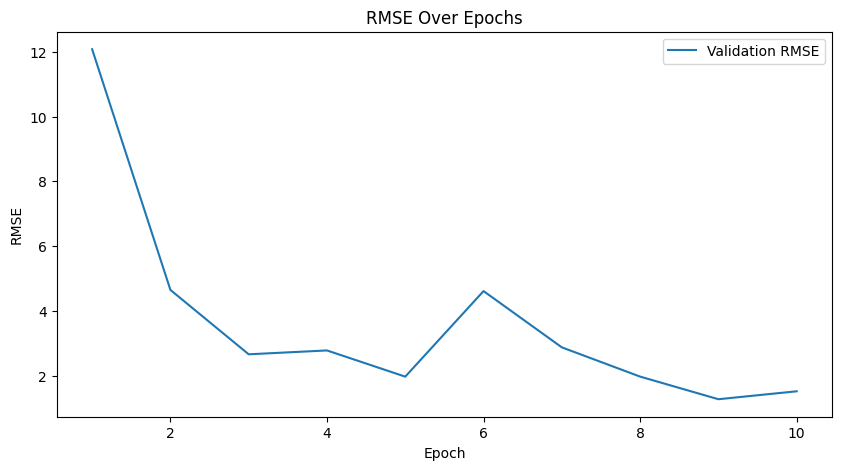

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Define the LSTM model
class SemanticRNN(Model):
    def __init__(self, units, dropout_rate=0.3, num_layers=2):
        super(SemanticRNN, self).__init__()
        self.lstm_layers = [LSTM(units, return_sequences=True if i < num_layers - 1 else False,
                                 recurrent_dropout=0.2) for i in range(num_layers)]
        self.dropouts = [Dropout(dropout_rate) for _ in range(num_layers)]
        self.dense = Dense(1)  # Single output neuron for regression

    def call(self, inputs):
        x = inputs
        for lstm, dropout in zip(self.lstm_layers, self.dropouts):
            x = lstm(x)
            x = dropout(x)
        return self.dense(x)

# Custom loss function
def custom_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Constants
M = 256
batch_size = 300000
k = 8
n = 8
seed = 42
f = 5.9e9
lamda = 0.05
Pt = 1
BW = 10e6
PLE = 2.8
Transmitted_Power_dBm = 20
Noise_val = 95
std_shadow = 3

# Data generation
np.random.seed(seed)
tf.random.set_seed(seed)

tr = np.floor(np.random.uniform(1, M, batch_size))
s = np.floor(np.random.uniform(1, M, batch_size)).astype('int64')
rand1 = np.random.normal(0, std_shadow, batch_size)

Beta = {}
SNR_var = {}
for i in range(batch_size):
    Beta[i] = 10 * np.log10(lamda / ((4 * np.pi * s[i]) ** PLE))
    SNR_var[i] = Beta[i] + Transmitted_Power_dBm - Noise_val + rand1[i]

ad_noise_SNR = np.array(list(SNR_var.values()))
ad_noise_SNR = np.expand_dims(ad_noise_SNR, axis=-1)  # Add a new axis for features
ad_noise_SNR = np.expand_dims(ad_noise_SNR, axis=-1)  # Add a new axis for timesteps
# Prepare tensors
X_tensor = tf.convert_to_tensor(ad_noise_SNR, dtype=tf.float32)
Y_tensor = tf.convert_to_tensor(ad_noise_SNR, dtype=tf.float32)

# Model setup
model = SemanticRNN(units=128, dropout_rate=0.3, num_layers=3)
model.compile(optimizer='adam', loss=custom_loss, metrics=['mean_squared_error'])

# Training setup
epochs = 10
batch_size = 64
validation_split = 0.2
num_val_samples = int(validation_split * len(X_tensor))
num_train_samples = len(X_tensor) - num_val_samples
train_dataset = tf.data.Dataset.from_tensor_slices((X_tensor[:num_train_samples], Y_tensor[:num_train_samples])).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((X_tensor[num_train_samples:], Y_tensor[num_train_samples:])).batch(batch_size)

# Manual training loop with RMSE tracking
rmse_history = []
val_rmse_history = []
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    # Training loop
    for x_batch, y_batch in train_dataset:
        model.train_on_batch(x_batch, y_batch)

    # Validation loop
    val_predictions = []
    val_targets = []
    for x_batch, y_batch in val_dataset:
        preds = model.predict_on_batch(x_batch)
        val_predictions.extend(preds.flatten())
        val_targets.extend(y_batch.numpy().flatten())

    # Calculate RMSE for validation data
    val_rmse = np.sqrt(mean_squared_error(val_targets, val_predictions))
    val_rmse_history.append(val_rmse)
    print(f"Validation RMSE: {val_rmse}")

# Plot RMSE history
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), val_rmse_history, label='Validation RMSE')
plt.title('RMSE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()